<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20MNB-LSTM%20for%204%20class%20classifications%20based%20on%20WSNBFSF%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid MNB-LSTM for 4 class classifications based on WSNBFSF dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
dataset = pd.read_csv("dataset.csv")

# Check for missing values
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

### **Data Preprocessing**

In [5]:
from keras.utils import np_utils
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=4)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(312106, 17)
(312106, 4)


In [6]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid MNB-DNN for 4 Class**

In [8]:
# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, np.argmax(y_train, axis=1))
y_pred_mnb = mnb.predict(X_test)
y_pred_mnb = to_categorical(y_pred_mnb, num_classes=4)

from sklearn.metrics import accuracy_score

# Calculate accuracy for Multinomial Naive Bayes model
accuracy_mnb = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_mnb, axis=1))
print("Multinomial Naive Bayes Accuracy:", accuracy_mnb)

Multinomial Naive Bayes Accuracy: 0.6147012806672976


In [9]:
from sklearn.metrics import classification_report
from keras.utils import to_categorical

# LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10)

y_pred_lstm = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
y_pred_lstm = to_categorical(y_pred_lstm, num_classes=4)

Epoch 1/10
26286/26286 [==============================] - 310s 12ms/step - loss: 0.5707 - accuracy: 0.8064
Epoch 2/10
26286/26286 [==============================] - 306s 12ms/step - loss: 0.4115 - accuracy: 0.8328
Epoch 3/10
26286/26286 [==============================] - 305s 12ms/step - loss: 0.3464 - accuracy: 0.8547
Epoch 4/10
26286/26286 [==============================] - 302s 12ms/step - loss: 0.3409 - accuracy: 0.8596
Epoch 5/10
26286/26286 [==============================] - 300s 11ms/step - loss: 0.2591 - accuracy: 0.8964
Epoch 6/10
26286/26286 [==============================] - 308s 12ms/step - loss: 0.5758 - accuracy: 0.8277
Epoch 7/10
26286/26286 [==============================] - 307s 12ms/step - loss: 0.4585 - accuracy: 0.8346
Epoch 8/10
26286/26286 [==============================] - 305s 12ms/step - loss: 0.7400 - accuracy: 0.7379
Epoch 9/10
26286/26286 [==============================] - 301s 11ms/step - loss: 0.2113 - accuracy: 0.9151
Epoch 10/10
6572/6572 [==============

In [10]:
# Combine models
y_pred = y_pred_mnb * 0.6 + y_pred_lstm * 0.4
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57     52500
           1       0.51      0.55      0.53     52554
           2       0.54      0.36      0.43     52545
           3       0.76      1.00      0.87     52682

    accuracy                           0.61    210281
   macro avg       0.60      0.61      0.60    210281
weighted avg       0.60      0.61      0.60    210281

[[29211 14277  6838  2174]
 [ 8023 28648  9108  6775]
 [13614 12889 18720  7322]
 [    0     0     1 52681]]


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid MNB-MLP Model


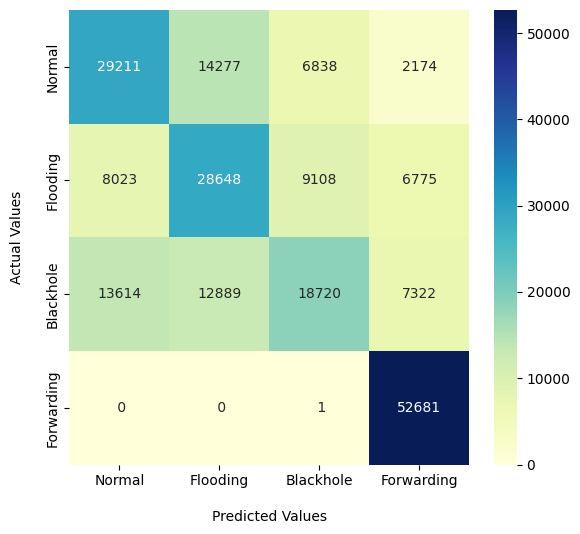

In [12]:
print("Confusion Matrix of Hybrid MNB-MLP Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)

In [13]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(4):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.5564, 1: 0.5451155002473647, 2: 0.3562660576648587, 3: 0.9999810181845792}
